## The Smith Parasite - MACHINE LEARNING 2022/2023
### Group 19

__`Step 1`__ Import the neccesary libraries

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

__`Step 2`__ Read in the data

In [2]:
# Import the data

# this is the *test() data maybe not useful at this point
test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')

# this is the *train* data
train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

__`Step 3`__ Given the fact that the dataset is split in 3 files we decided to merge them togheter using the common attribute ''PatientID'' and set it as index

In [3]:
# merge training data
train_data = train_health.merge(train_habits, on='PatientID')
train_data = train_data.merge(train_demo, on='PatientID')
train_data.set_index('PatientID', inplace = True)
train_data

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Name,Birth_Year,Region,Education,Disease
PatientID,,,,,,,,,,,,,,,,,,
1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1
1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1
1557,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1
1658,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. David Caffee,1958,London,University Complete (3 or more years),0
1544,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0
1386,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1
1088,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade),0


__`Step 4`__ Check the variable datatypes

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Height            800 non-null    int64 
 1   Weight            800 non-null    int64 
 2   High_Cholesterol  800 non-null    int64 
 3   Blood_Pressure    800 non-null    int64 
 4   Mental_Health     800 non-null    int64 
 5   Physical_Health   800 non-null    int64 
 6   Checkup           800 non-null    object
 7   Diabetes          800 non-null    object
 8   Smoking_Habit     800 non-null    object
 9   Drinking_Habit    800 non-null    object
 10  Exercise          800 non-null    object
 11  Fruit_Habit       800 non-null    object
 12  Water_Habit       800 non-null    object
 13  Name              800 non-null    object
 14  Birth_Year        800 non-null    int64 
 15  Region            800 non-null    object
 16  Education         787 non-null    object
 17  Disease     

__`Step 5`__ Check if missing values exist

In [5]:
train_data.isna().sum()

Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
dtype: int64

__`Step 6`__ Assign target variable to an array

In [6]:
target = train_data['Disease']
target

PatientID
1167    1
1805    1
1557    1
1658    0
1544    1
       ..
1909    0
1386    1
1088    0
1662    1
1117    0
Name: Disease, Length: 800, dtype: int64

__`Step 7`__ Drop target variable from dataset and 

In [7]:
train_data.drop(['Disease'], inplace=True, axis = 1)
train_data


,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Name,Birth_Year,Region,Education
PatientID,,,,,,,,,,,,,,,,,
1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade)
1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade)
1557,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade)
1658,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. David Caffee,1958,London,University Complete (3 or more years)
1544,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade)
1386,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade)
1088,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade)


__`Step 8`__ Define metric and non-metric features for future use

In [8]:
non_metric_features = ["Education", "Checkup", "Diabetes", "Fruit_Habit","Region","Name", "Drinking_Habit", "Water_Habit", "Smoking_Habit" , "Exercise"]
metric_features = train_data.columns.drop(non_metric_features).to_list()
print('\n',"Non-metric:",non_metric_features,'\n')
print('\n',"Metric:",metric_features,'\n')


 Non-metric: ['Education', 'Checkup', 'Diabetes', 'Fruit_Habit', 'Region', 'Name', 'Drinking_Habit', 'Water_Habit', 'Smoking_Habit', 'Exercise'] 


 Metric: ['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Physical_Health', 'Birth_Year'] 



__`Step 9`__ Check if categorical data has no input errors

In [9]:
for metric in non_metric_features:
    print('\n',metric,'\n',train_data[metric].value_counts())


 Education 
 University Complete (3 or more years)          239
High School Graduate                           196
Elementary School (1st to 9th grade)           183
High School Incomplete (10th to 11th grade)    102
University Incomplete (1 to 2 years)            37
I never attended school / Other                 30
Name: Education, dtype: int64

 Checkup 
 More than 3 years                         429
Not sure                                  312
Less than 3 years but more than 1 year     53
Less than three months                      6
Name: Checkup, dtype: int64

 Diabetes 
 Neither I nor my immediate family have diabetes.                              392
I have/had pregnancy diabetes or borderline diabetes                          206
I do have diabetes                                                            144
I don't have diabetes, but I have direct family members who have diabetes.     58
Name: Diabetes, dtype: int64

 Fruit_Habit 
 Less than 1. I do not consume fruits eve

Observations:
1. The variable Region has a variable 2 categories for the british capital: "London" and "LONDON", we decided to **standardize** to ''London''
2. We have 2 repeating names but that is **not an issue**
3. The values from smoking habit & exercise can be transformed to numeric binary but we'll leave that for later


In [10]:
train_data['Region'] = train_data['Region'].replace('LONDON','London')
train_data['Region'].value_counts()

East Midlands               154
London                      141
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
Name: Region, dtype: int64

Check number of duplicates <br> In this case we have **none**

In [11]:
len(train_data)-len(train_data.drop_duplicates())

0

Given the fact the Smith Disease is new we have made the assumption that the year of the dataset is 2022

In [12]:
# convert birth year to age
train_data['Birth_Year'] = datetime.now().year - train_data['Birth_Year']
train_data.rename(columns = {'Birth_Year':'Age in 2022'}, inplace = True)
train_data

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Name,Age in 2022,Region,Education
PatientID,,,,,,,,,,,,,,,,,
1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mrs. Stephanie Gay,57,London,High School Incomplete (10th to 11th grade)
1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mr. Sherman Nero,53,South West,High School Incomplete (10th to 11th grade)
1557,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. Mark Boller,48,Yorkshire and the Humber,Elementary School (1st to 9th grade)
1658,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. David Caffee,64,London,University Complete (3 or more years)
1544,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. Gerald Emery,54,South East,University Incomplete (1 to 2 years)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mr. Philip Klink,50,East Midlands,High School Incomplete (10th to 11th grade)
1386,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mrs. Jackie Valencia,42,North West,Elementary School (1st to 9th grade)
1088,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,Mrs. Cheryl Harris,162,East Midlands,Elementary School (1st to 9th grade)


In [13]:
non_metric_features = ["Education", "Checkup", "Diabetes", "Fruit_Habit","Region","Name", "Drinking_Habit", "Water_Habit", "Smoking_Habit" , "Exercise"]
metric_features = train_data.columns.drop(non_metric_features).to_list()
print('\n',"Non-metric:",non_metric_features,'\n')
print('\n',"Metric:",metric_features,'\n')


 Non-metric: ['Education', 'Checkup', 'Diabetes', 'Fruit_Habit', 'Region', 'Name', 'Drinking_Habit', 'Water_Habit', 'Smoking_Habit', 'Exercise'] 


 Metric: ['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Physical_Health', 'Age in 2022'] 



Perform the train-test split


In [14]:
X_train, X_val, y_train, y_val = train_test_split(train_data,target, test_size = 0.25, random_state = 0, stratify = target, shuffle = True)

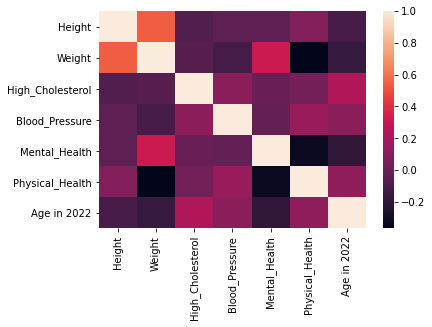

In [15]:
import seaborn as sns
cormat = X_train.corr()
sns.heatmap(cormat);

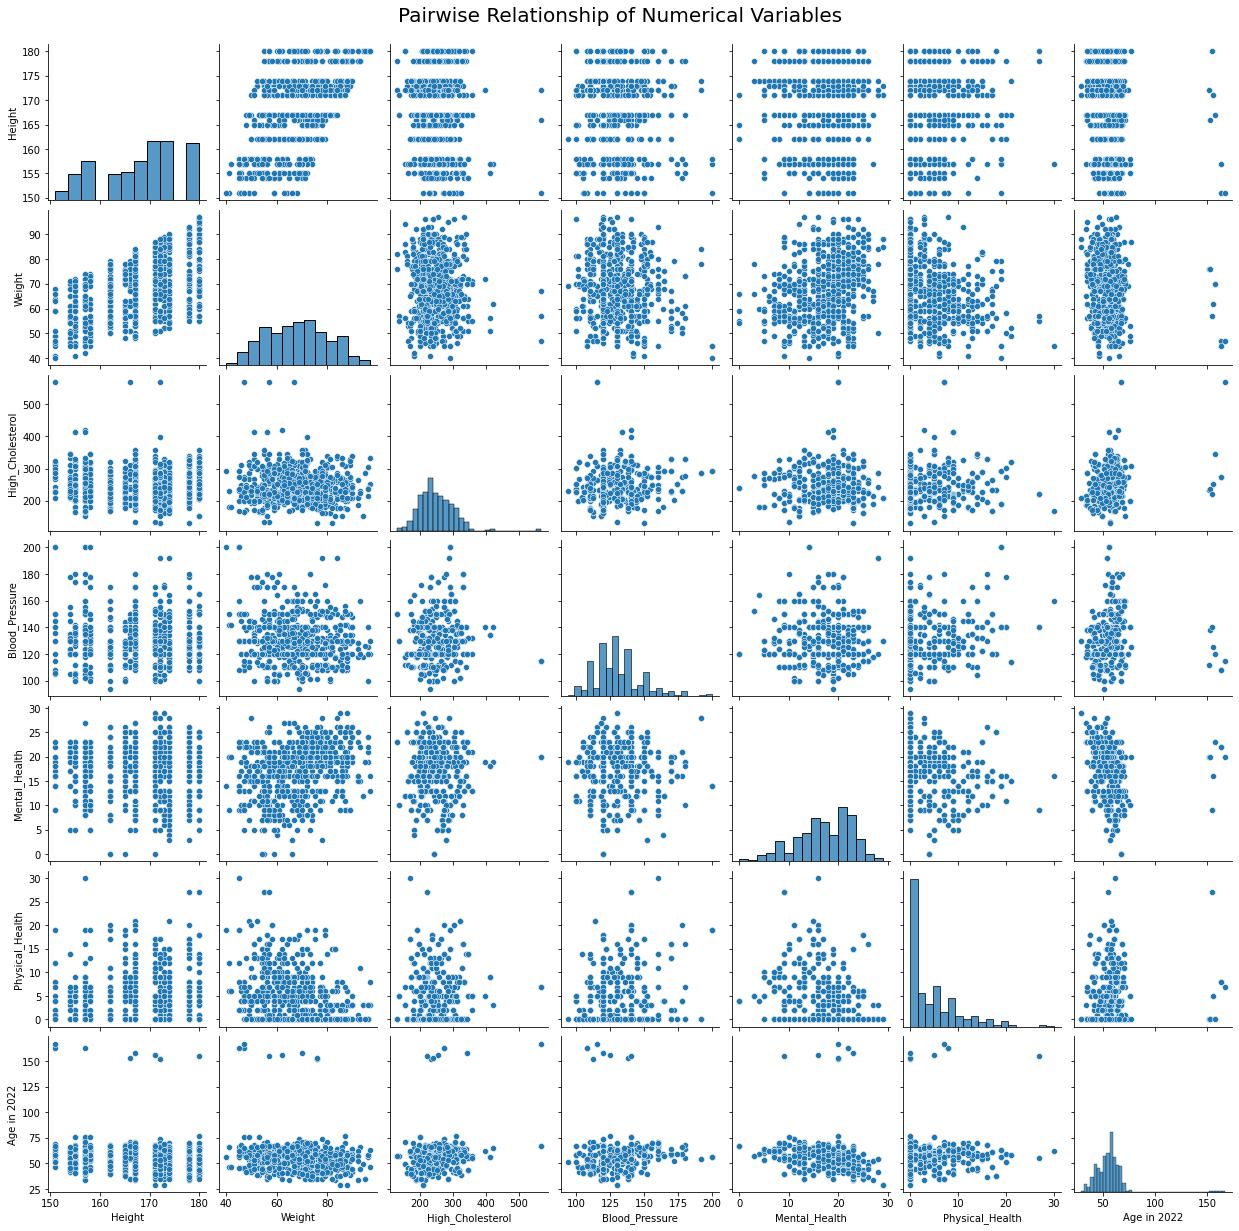

In [16]:
# Setting pairplot
sns.pairplot(X_train[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

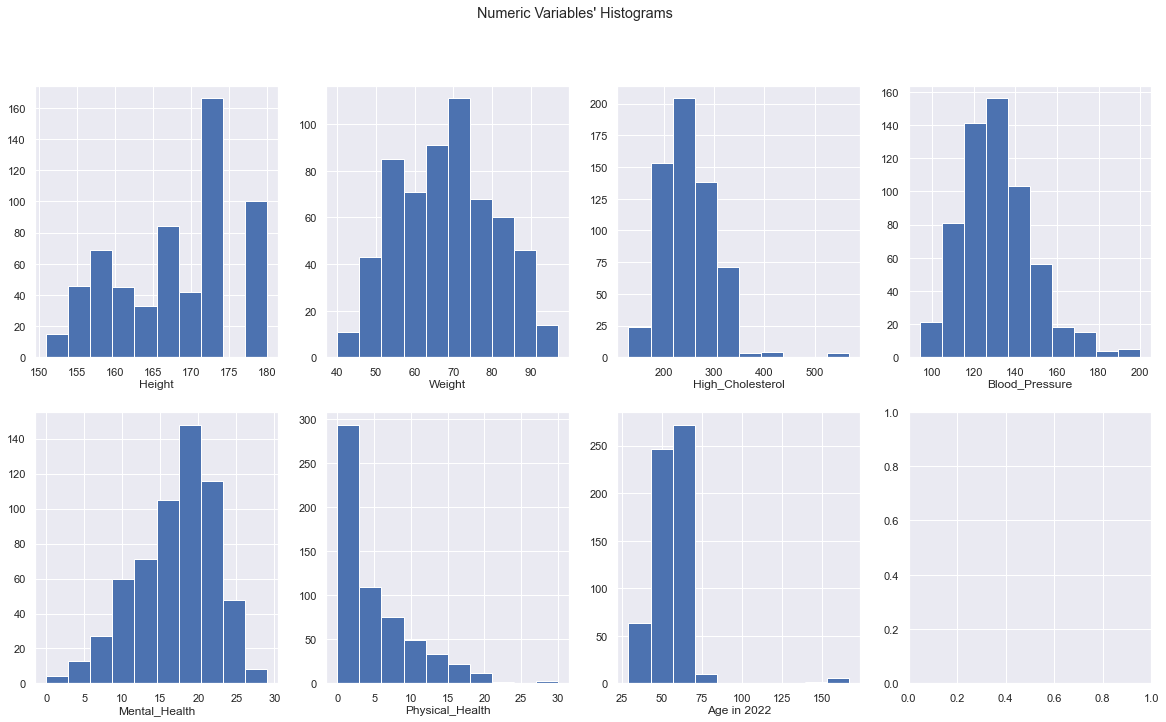

In [17]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(X_train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

Compare the spreads of the normalized column to the original one

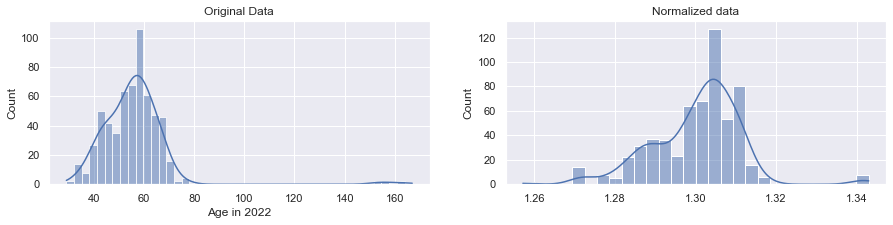

In [18]:
normalized_data = stats.boxcox(X_train['Age in 2022'])

fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X_train['Age in 2022'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

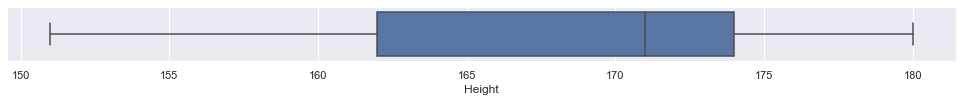

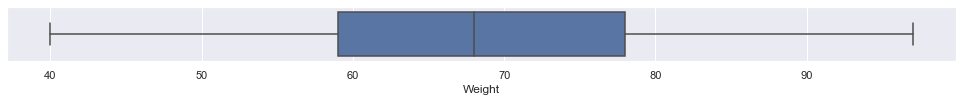

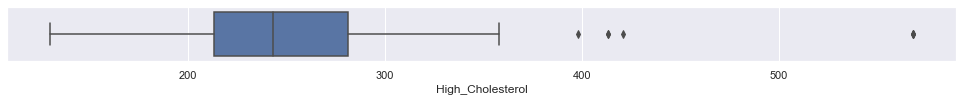

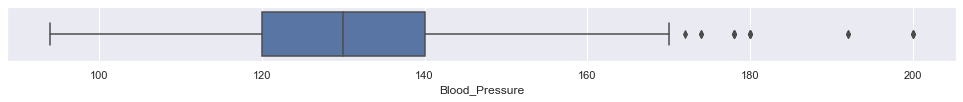

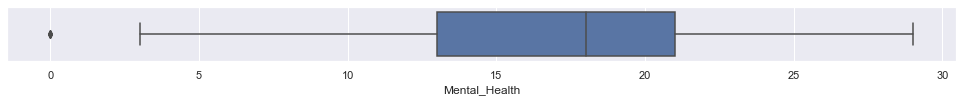

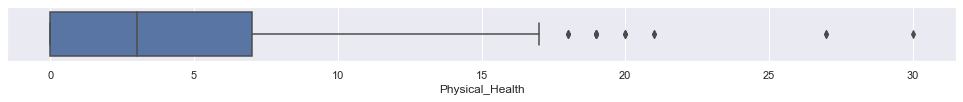

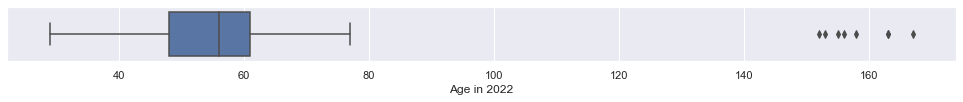

In [19]:
X_train_metric=X_train.select_dtypes(exclude=['object'])

for column in X_train_metric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=X_train_metric, x=column)

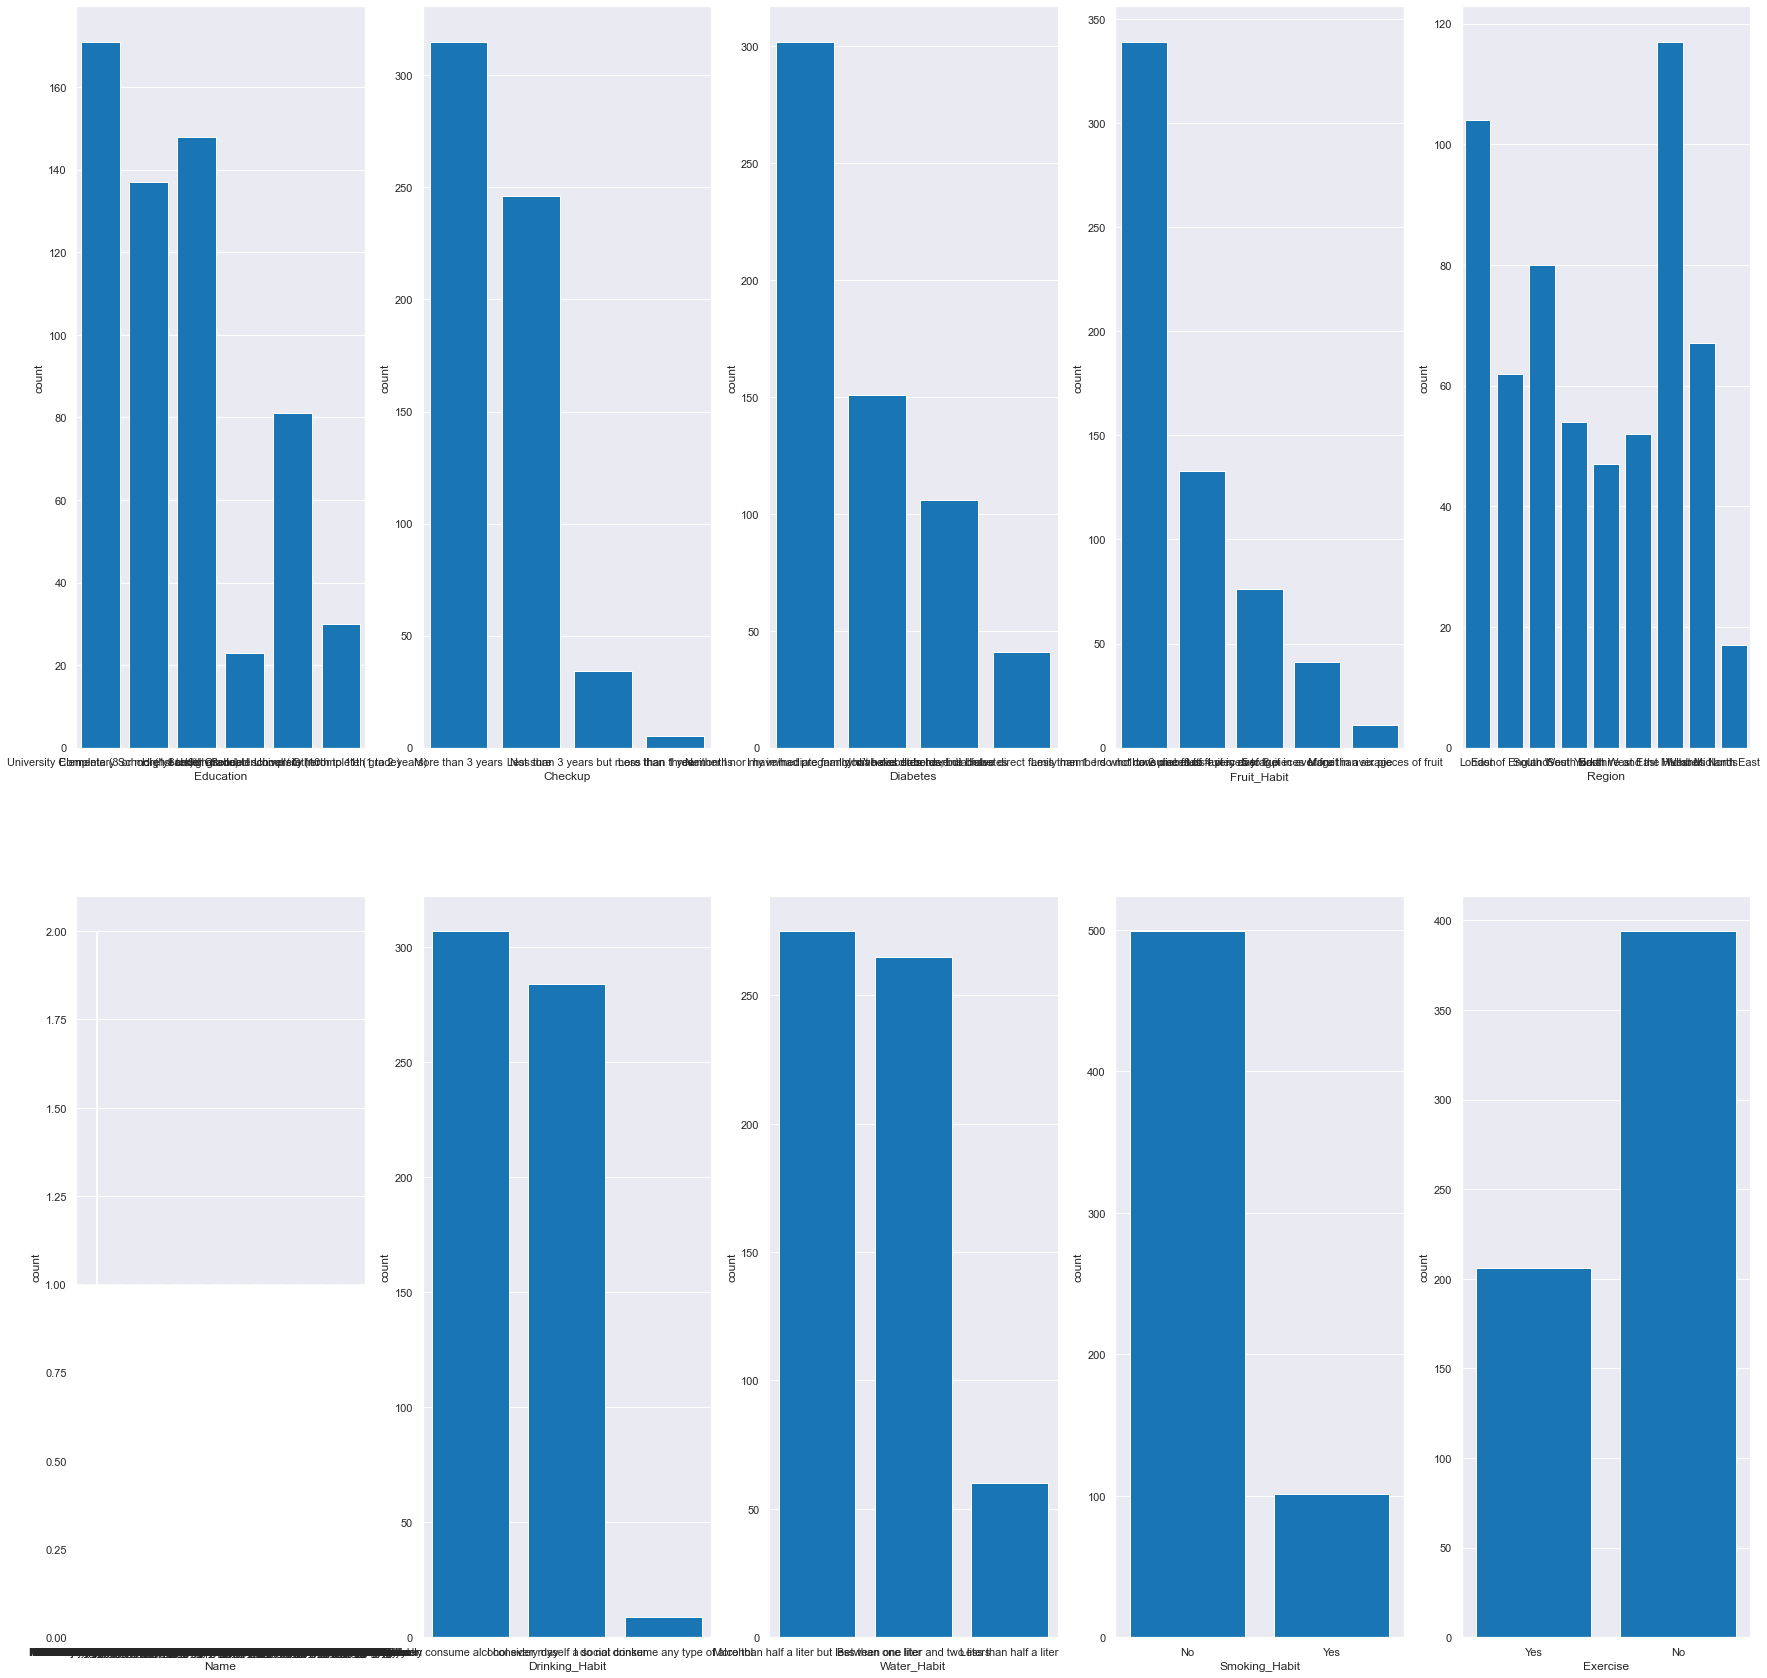

In [20]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(30, 30))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=X_train[feat].astype(object), ax=ax, color='#007acc')

plt.show()

In [21]:
q25 = X_train.quantile(.25)
q75 = X_train.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(X_train[metric].between(llim, ulim, inclusive=True))

X_train.reset_index(inplace = True)    
    
filters2 = pd.Series(np.all(filters2, 0))
X_train_filtered = X_train[filters2]
print('Percentage of data kept after removing outliers:', np.round(X_train_filtered.shape[0] / X_train.shape[0], 4))
X_train_filtered



Percentage of data kept after removing outliers: 0.9233


,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Name,Age in 2022,Region,Education
0,1532,157,55,201,124,14,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mrs. Marie Romero,63,London,University Complete (3 or more years)
1,1145,171,59,171,110,9,9,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. Kevin Rogers,40,East of England,Elementary School (1st to 9th grade)
2,1717,171,68,260,130,16,2,Less than 3 years but more than 1 year,I have/had pregnancy diabetes or borderline di...,Yes,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. James Orr,56,South West,High School Graduate
3,1497,162,70,236,154,21,0,More than 3 years,I do have diabetes,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,Between one liter and two liters,Mr. Bruce Shook,57,London,High School Graduate
4,1556,174,79,181,140,20,0,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. Brain Vaquera,59,South West,I never attended school / Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1172,165,48,244,120,22,0,More than 3 years,I do have diabetes,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. Edward Fahrlander,56,East of England,University Complete (3 or more years)
596,1870,172,84,279,130,15,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mrs. Ashley Berry,48,West Midlands,I never attended school / Other
597,1289,171,87,227,152,25,0,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mr. Coy Appel,40,London,University Complete (3 or more years)
598,1328,178,72,326,130,8,11,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,5 to 6 pieces of fruit in average,More than half a liter but less than one liter,Mr. Kelly Ogorman,70,South West,University Complete (3 or more years)


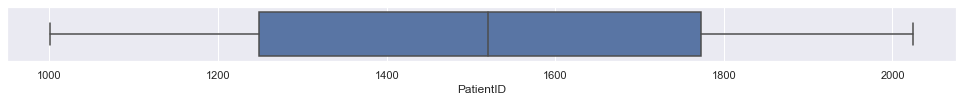

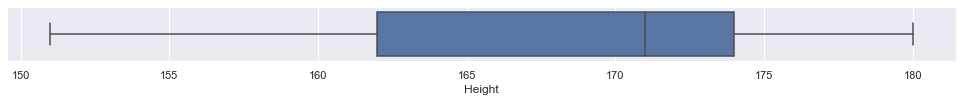

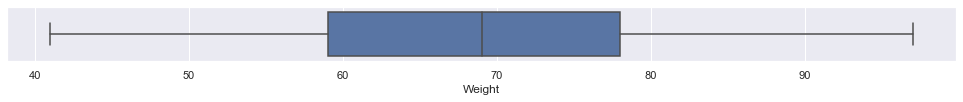

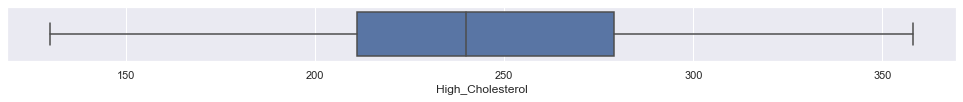

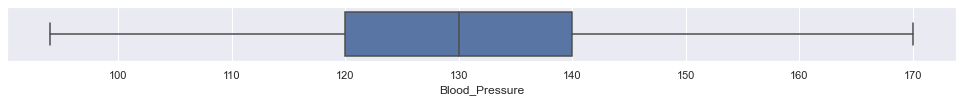

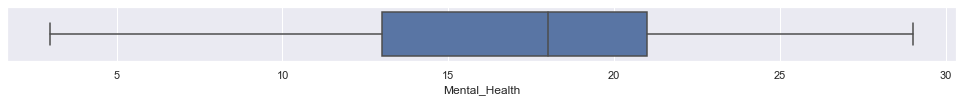

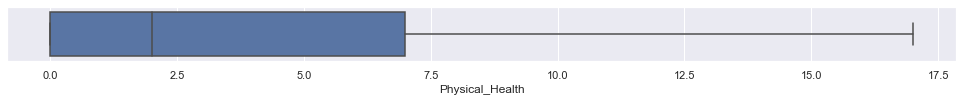

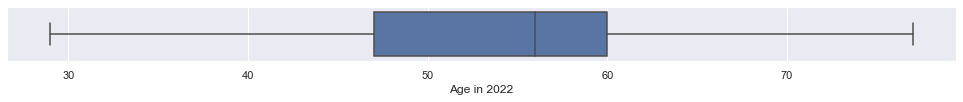

In [22]:
X_train_filtered_bloxplots = X_train_filtered.select_dtypes(exclude=['object'])

for column in X_train_filtered_bloxplots:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=X_train_filtered_bloxplots, x=column)

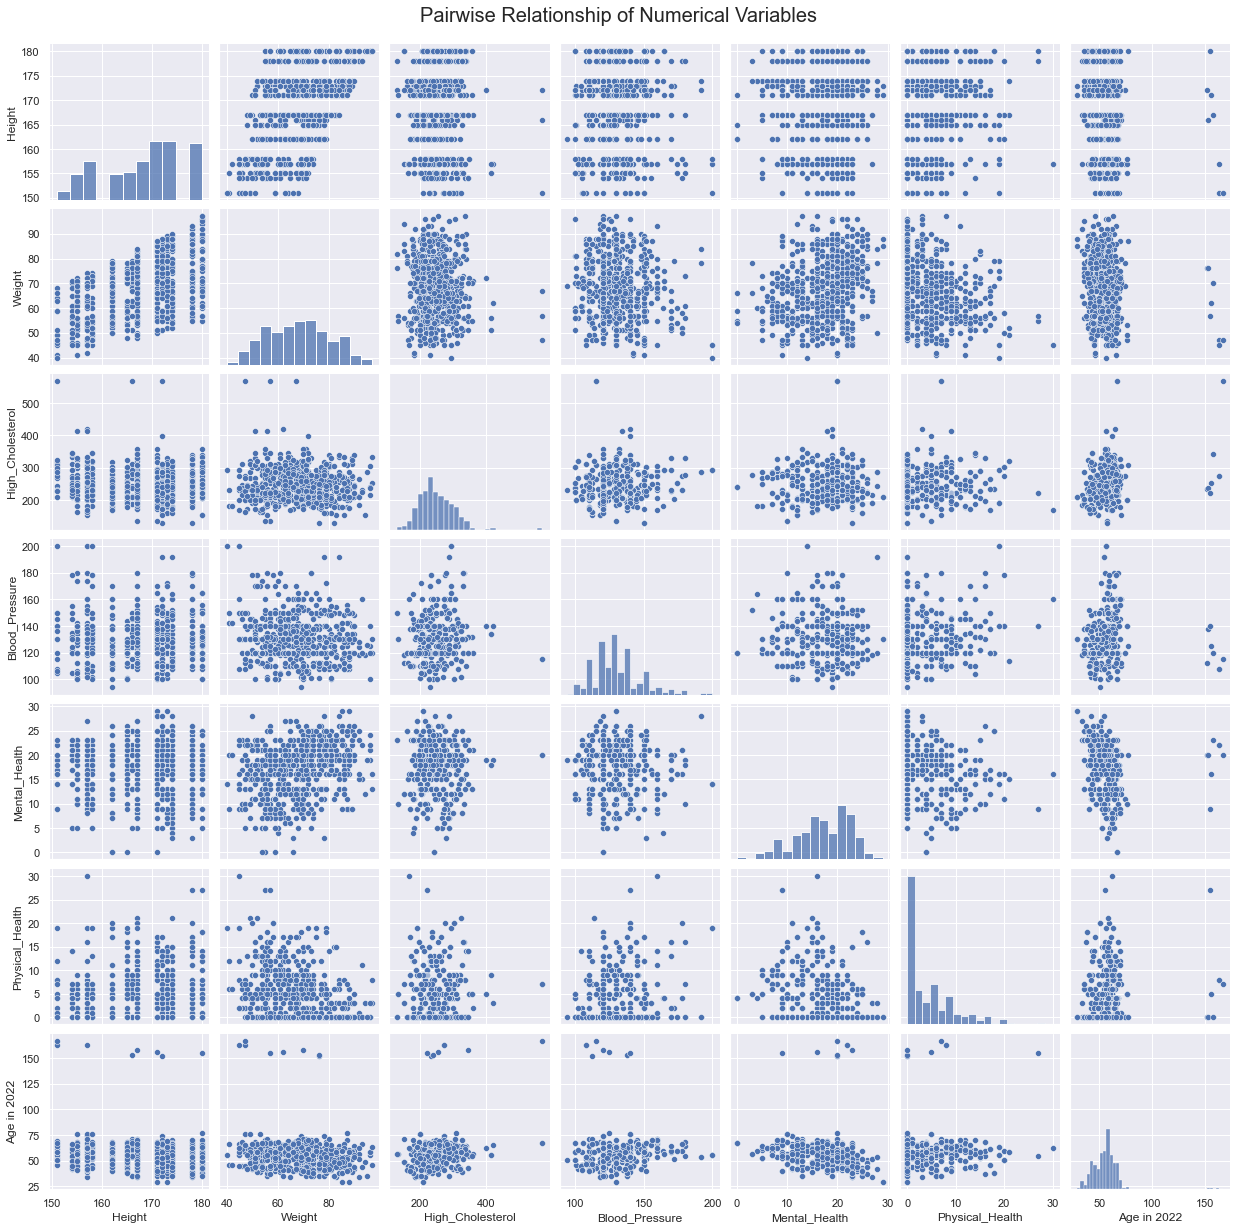

In [23]:
sns.pairplot(X_train[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [24]:
# fill NaN of education with whatever
#df = train_data.fillna(train_data['Education'].value_counts().index[0])
X_train_filtered

,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Name,Age in 2022,Region,Education
0,1532,157,55,201,124,14,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mrs. Marie Romero,63,London,University Complete (3 or more years)
1,1145,171,59,171,110,9,9,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. Kevin Rogers,40,East of England,Elementary School (1st to 9th grade)
2,1717,171,68,260,130,16,2,Less than 3 years but more than 1 year,I have/had pregnancy diabetes or borderline di...,Yes,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. James Orr,56,South West,High School Graduate
3,1497,162,70,236,154,21,0,More than 3 years,I do have diabetes,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,Between one liter and two liters,Mr. Bruce Shook,57,London,High School Graduate
4,1556,174,79,181,140,20,0,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. Brain Vaquera,59,South West,I never attended school / Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1172,165,48,244,120,22,0,More than 3 years,I do have diabetes,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. Edward Fahrlander,56,East of England,University Complete (3 or more years)
596,1870,172,84,279,130,15,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mrs. Ashley Berry,48,West Midlands,I never attended school / Other
597,1289,171,87,227,152,25,0,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mr. Coy Appel,40,London,University Complete (3 or more years)
598,1328,178,72,326,130,8,11,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,5 to 6 pieces of fruit in average,More than half a liter but less than one liter,Mr. Kelly Ogorman,70,South West,University Complete (3 or more years)


In [25]:
# fill NaN of education with 'Unmentioned'
X_train = X_train_filtered.fillna('Unmentioned')
X_train

,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Name,Age in 2022,Region,Education
0,1532,157,55,201,124,14,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mrs. Marie Romero,63,London,University Complete (3 or more years)
1,1145,171,59,171,110,9,9,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. Kevin Rogers,40,East of England,Elementary School (1st to 9th grade)
2,1717,171,68,260,130,16,2,Less than 3 years but more than 1 year,I have/had pregnancy diabetes or borderline di...,Yes,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. James Orr,56,South West,High School Graduate
3,1497,162,70,236,154,21,0,More than 3 years,I do have diabetes,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,Between one liter and two liters,Mr. Bruce Shook,57,London,High School Graduate
4,1556,174,79,181,140,20,0,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. Brain Vaquera,59,South West,I never attended school / Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1172,165,48,244,120,22,0,More than 3 years,I do have diabetes,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. Edward Fahrlander,56,East of England,University Complete (3 or more years)
596,1870,172,84,279,130,15,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mrs. Ashley Berry,48,West Midlands,I never attended school / Other
597,1289,171,87,227,152,25,0,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Mr. Coy Appel,40,London,University Complete (3 or more years)
598,1328,178,72,326,130,8,11,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,5 to 6 pieces of fruit in average,More than half a liter but less than one liter,Mr. Kelly Ogorman,70,South West,University Complete (3 or more years)


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 599
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         554 non-null    int64 
 1   Height            554 non-null    int64 
 2   Weight            554 non-null    int64 
 3   High_Cholesterol  554 non-null    int64 
 4   Blood_Pressure    554 non-null    int64 
 5   Mental_Health     554 non-null    int64 
 6   Physical_Health   554 non-null    int64 
 7   Checkup           554 non-null    object
 8   Diabetes          554 non-null    object
 9   Smoking_Habit     554 non-null    object
 10  Drinking_Habit    554 non-null    object
 11  Exercise          554 non-null    object
 12  Fruit_Habit       554 non-null    object
 13  Water_Habit       554 non-null    object
 14  Name              554 non-null    object
 15  Age in 2022       554 non-null    int64 
 16  Region            554 non-null    object
 17  Education       

In [45]:
X_train.head()

,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Name,Age in 2022,Region,Education
0,1532,157,55,201,124,14,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mrs. Marie Romero,63,London,University Complete (3 or more years)
1,1145,171,59,171,110,9,9,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Mr. Kevin Rogers,40,East of England,Elementary School (1st to 9th grade)
2,1717,171,68,260,130,16,2,Less than 3 years but more than 1 year,I have/had pregnancy diabetes or borderline di...,Yes,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. James Orr,56,South West,High School Graduate
3,1497,162,70,236,154,21,0,More than 3 years,I do have diabetes,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,Between one liter and two liters,Mr. Bruce Shook,57,London,High School Graduate
4,1556,174,79,181,140,20,0,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Mr. Brain Vaquera,59,South West,I never attended school / Other


In [52]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

Ordinals = ['Education', 'Checkup', 'Diabetes','Drinking_Habit','Fruit_Habit','Water_Habit']
Nominals = ['Region','Smoking_Habit','Exercise']
OHenc = OneHotEncoder()
OEenc = OrdinalEncoder()

Xtraintest = OHenc.fit(X_train)
Xtraintest

Xtraintest.transform(([['Yes', 1], ['No', 0]]).toarray())

AttributeError: 'list' object has no attribute 'toarray'

### Outlier removal & data input complete

__`Step 8`__ Data Scaling: MinMaxScaler(0,1), MinMaxScaler(-1,1) Simple Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_train))


ValueError: could not convert string to float: 'More than 3 years'

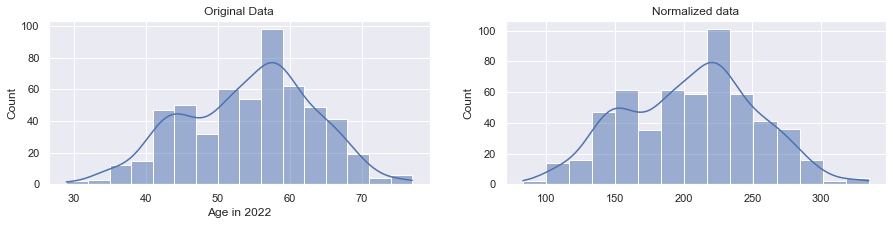

In [28]:
normalized_data = stats.boxcox(X_train['Age in 2022'])

fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X_train['Age in 2022'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [34]:

for metric in metric_features:
    stats.boxcox(X_train[metric])
    
X_train

ValueError: Data must be positive.

In [31]:
for metric in metric_features:
    X_train[metric], ax=ax[0], kde=True, legend=False)
    

X_train = stats.boxcox(X_train[metric_features])

fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X_train[metric_features], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Normalized Data")
plt.show()

ValueError: Data must be 1-dimensional.

In [38]:
for metric in metric_features:
    print(X_train[metric].min())
metric_features

151
41
130
94
3
0
29


['Height',
 'Weight',
 'High_Cholesterol',
 'Blood_Pressure',
 'Mental_Health',
 'Physical_Health',
 'Age in 2022']

In [30]:
# replace yes & no with binary 1 and 0 for Smoking Habit and Exercise
# X_train['Smoking_Habit'] = X_train['Smoking_Habit'].map({'Yes':1 ,'No':0})
# X_train['Exercise'] = X_train['Exercise'].map({'Yes':1 ,'No':0})

NameError: name 'df' is not defined

__`Step X`__ Remove variable "Name" because it is not useful

In [ ]:
#metric_features.pop(0)

In [ ]:
X_train['Education'].value_counts()

Given the fact that Smoking_Habit and Exercise variables are binary (Yes/No) we decied to make thier values numerical (No = 0; Yes = 1)